# Summary

Exploration of a geomorphic Hamiltonian for rockslopes.

### Parameter files

In [1]:
# Specify the parameter files for the job
import os
if 'GME_NB_PR' not in os.environ.keys():
    pr_filenames = ['']
else:
    pr_filenames = eval(os.environ['GME_NB_PR'])

### Logging

In [2]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(level=logging.INFO, format=f'%(message)s')

### Modules

In [3]:
# Import Numpy
import numpy as np

# Import SymPy and set up latex inline & pretty dict printing
from sympy import (
    Eq,
    lambdify,
    sin,
    cos,
    Rational,
    sqrt,
    solve,
    N,
    init_printing,
    trigsimp,
    rad,
)

# Set up latex inline printing
init_printing(use_unicode=True, pretty_print=True, wrap_line=True)

# Pretty dict printing etc
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4).pprint

# Import Geomorphysics library functions, classes
from gmplib.utils import e2d
from gmplib.save import create_directories, export_plots
from gmplib.parameters import import_parameters, Parameters

# Import GME classes and do a wildcard (!) import of all GME symbol definitions
# from gme.core.symbols import *
from gme.core.symbols import (
    v,
    vx,
    vz,
    s,
    alpha,
    varphi,
    eta,
    mu,
    Ci,
    Lc,
    varepsilonhat,
    varphi_0,
    xiv_0,
    L,
    F,
    r,
)
from gme.core.equations import Equations
from gme.plot.indicatrix_new import IndicatrixNew

# Decide where we're working and thus where to find the job parameter files
#   -  use the GME_WORKING_PATH environment variable if it's defined
#   -  otherwise, deduce that we're working in the GME notebook dir
if "GME_WORKING_PATH" in os.environ.keys():
    working_path = os.environ["GME_WORKING_PATH"]
    print(
        f"Fetching working path from environment variable GME_WORKING_PATH = {working_path}"
    )
else:
    from gmplib.utils import get_pkg_path
    import gme

    working_path = get_pkg_path(gme)
    print(f"Deducing working path from GME package location = {working_path}")
    del gme

# Set the path to the parameter files for this nb and report
pr_path = os.path.join(working_path, "Parameters", "Theory")
pr_path, pr_filenames


Deducing working path from GME package location = /Users/colinstark/Projects/GME


('/Users/colinstark/Projects/GME/Parameters/Theory', [''])

In [4]:
from matplotlib import pyplot as plt

### Parameter parsing

In [5]:
# parameters_dict,_ = import_parameters(pr_path, [os.path.join('..','defaults'), *pr_filenames])
# evaluations = {}
# evaluations_sequence = ()
# pr = Parameters(parameters_dict, evaluations=evaluations, sequence=evaluations_sequence)
# [pp(psubobj.__dict__) for psubobj in (pr.job, pr.model, pr.solve, pr.resolve, pr.plot, pr.save)];

In [6]:
# subexp = {
#     eta: pr.model.eta,
#     mu: pr.model.mu
# }
# sub = {
#         Ci: pr.model.Ci, 
#         Lc: pr.model.Lc, 
#         varepsilonhat: pr.model.varepsilonhat, 
#         varphi_0: pr.model.varphi_0,
#         xiv_0: pr.model.xiv_0,
# #         kappa_h: pr.model.kappa_h,
# #         h_0: pr.model.h_0,
# #         x_sigma: pr.model.x_sigma,
# #         x_h: pr.model.x_h
# }
# Eq(eta,pr.model.eta), Eq(mu,pr.model.mu), Eq(mu/eta,pr.model.mu/pr.model.eta), sub

# Theory

### Basics

In [7]:
# gmeq = Equations( eta_=pr.model.eta, 
#                   mu_=pr.model.mu, 
#                   beta_type=pr.model.beta_type, 
#                   varphi_type=pr.model.varphi_type, 
# #                   ibc_type=pr.model.ibc_type,
#                   parameters=sub, 
#                   do_raw=False )

In [8]:
# prefix = ('_').join([pr.job.short_name, gmeq.beta_type+'beta'])
# # prefix = ('_').join([pr.job.short_name, gmeq.beta_type+'beta', gmeq.varphi_type.replace('-','')])

# suffix = f'_eta{float(N(gmeq.eta_))}'
# # suffix += f'_ratio{ float(sy.N(gmeq.mu/gmeq.eta)):0.2f}' if gmeq.mu/gmeq.eta==Rational(1,3) \
# #                                     else f'_ratio{ float(sy.N(gmeq.mu/gmeq.eta)):0.1f}'
# # suffix += f'_xiv{float(sy.N(pr.model.xiv_0)):1.0f}'
# # suffix = (suffix if pr.model.varphi_type=='ramp' \
# #             else suffix+f'_xh{float(gmes.parameters[x_h]):1.1f}').replace('.','p')

# job_name = prefix+suffix.replace('.','p')
# job_name

In [9]:
from gme.core.symbols import *
from sympy import (
    Symbol,
    Function,
    exp,
    tan,
    asin,
    Abs,
    simplify,
    diff,
    Matrix,
    powsimp,
    expand,
    factor,
    denom,
    numer,
    expand_trig,
)
import sympy as sy


In [10]:
xi_rs0: Symbol = Symbol(
    r"\xi^{\perp_0}_{\mathrm{rs}}", real=True, positive=True
)
xi_rs: Function = Function(
    r"\xi^{\perp}_{\mathrm{rs}}", real=True, positive=True
)

n: Symbol = Symbol(r"n", real=True, positive=True)


px: Symbol = Symbol(r"p_x", real=True, positive=True)
pz: Symbol = Symbol(r"p_z", real=True, negative=True)

phi: Symbol = Symbol(r"\phi", real=True, positive=True)
beta: Symbol = Symbol(r"\beta", real=True, positive=True)


xi_rs(beta), xi_rs0, phi, beta


### Erosion function

Remember that $p_z$ is NEGATIVE, but $\beta$ is required to be POSITIVE.

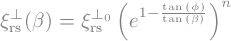

In [11]:
rs_tan_erosion_eqn = Eq(
    xi_rs(beta), powsimp(xi_rs0 * (exp(1 - tan(phi) / tan(beta)) ** n))
)
rs_tan_erosion_eqn


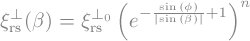

In [12]:
rs_sin_erosion_eqn = Eq(
    xi_rs(beta), powsimp(xi_rs0 * (exp(1 - sin(phi) / Abs(sin(beta))) ** n))
)
rs_sin_erosion_eqn


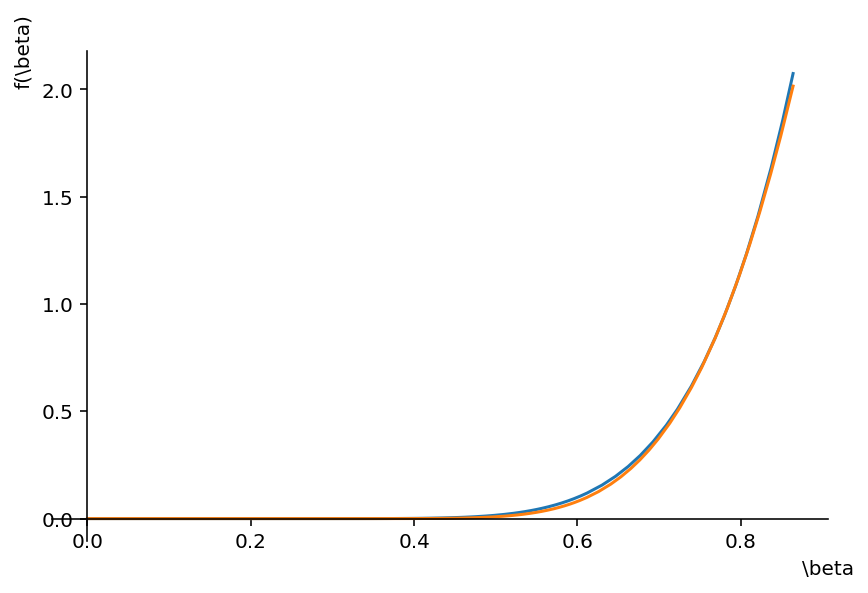

In [13]:
p1 = sy.plot(rs_tan_erosion_eqn.rhs.subs({phi:sy.pi/4,xi_rs0:1, n:5}), (beta,0,sy.pi/4*1.1), show=False);
p2 = sy.plot(rs_sin_erosion_eqn.rhs.subs({phi:sy.pi/4,xi_rs0:1, n:10}), (beta,0,sy.pi/4*1.1), show=False);
p1.extend(p2)
p1.show()

In [14]:
# rs_erosion_eqn = rs_tan_erosion_eqn
rs_erosion_eqn = rs_sin_erosion_eqn

### Fundamental function & Hamiltonian

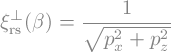

In [15]:
xirs_pxpz_eqn = Eq(xi_rs(beta), 1/sqrt(px**2+pz**2))
xirs_pxpz_eqn

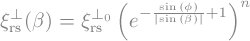

In [16]:
rs_erosion_eqn

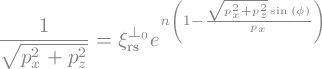

In [17]:
rs_pxpz_eqn = (
    rs_erosion_eqn
        .subs(e2d(xirs_pxpz_eqn))
        .subs({tan(beta):(-px/pz)})
        .subs({sin(beta):(px/sqrt(px**2+pz**2))})
)
rs_pxpz_eqn

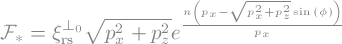

In [18]:
Fstar_rs_pxpz_eqn = Eq(
    Fstar,
    solve(simplify(rs_pxpz_eqn.subs({px: px/Fstar, pz: pz/Fstar})), Fstar)[
        0
    ],
)
Fstar_rs_pxpz_eqn

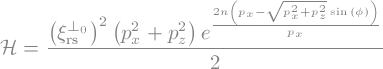

In [19]:
H_rs_pxpz_eqn = Eq(H, Fstar_rs_pxpz_eqn.rhs**2 / 2)
H_rs_pxpz_eqn

Check Euler homogeneity

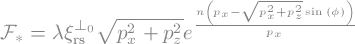

In [20]:
simplify( Fstar_rs_pxpz_eqn.subs({px:lmbda*px, pz:lmbda*pz}) )

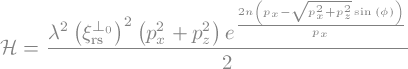

In [21]:
simplify( H_rs_pxpz_eqn.subs({px:lmbda*px, pz:lmbda*pz}) )

### Hamilton's equations

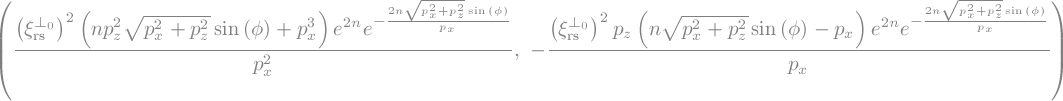

In [22]:
v_pxpz_eqn = Eq(
    Matrix([rdotx, rdotz]),
    Matrix(
        [
            factor(simplify(diff(H_rs_pxpz_eqn.rhs, px))),
            factor(simplify(diff(H_rs_pxpz_eqn.rhs, pz))),
        ]
    ),
)
(
    v_pxpz_eqn.rhs[0],
    v_pxpz_eqn.rhs[1],
)


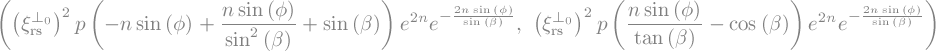

In [23]:
v_p_beta_eqn = (
    trigsimp( v_pxpz_eqn.subs({px:p*sin(beta), pz:-p*cos(beta)}) )
)
(v_p_beta_eqn.rhs[0], v_p_beta_eqn.rhs[1], )


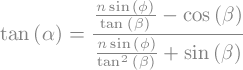

In [24]:
tanalpha_eqn = Eq(
    tan(alpha),
    trigsimp( v_p_beta_eqn.rhs[1]/v_p_beta_eqn.rhs[0] )
)
tanalpha_eqn

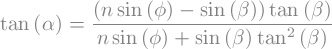

In [25]:
simplify(tanalpha_eqn)

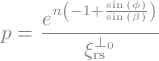

In [26]:
p_conjugate_beta_eqn = Eq(
    p,
    powsimp(solve(
        simplify(
            Eq(
                (v_p_beta_eqn.rhs[0] * px + v_p_beta_eqn.rhs[1] * pz).subs(
                    {px: p*sin(beta), pz: -p*cos(beta)}
                ),
                1,
            )
        ),
        p,
    )[0]),
)
p_conjugate_beta_eqn


### Choose some parameters

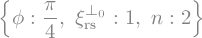

In [27]:
n_ = 2
beta_ = np.pi/5
phi_ = sy.pi/4
xi_rs0_ = 1

sub_ = {xi_rs0:xi_rs0_, n:n_, phi:phi_}
sub_

### Try to locate critical angles

In [28]:
from sympy.simplify.fu import TR2

In [29]:
tanalpha_eqn_tmp = simplify(tanalpha_eqn)
_ = Eq(
    (tanalpha_eqn_tmp.lhs*denom(tanalpha_eqn_tmp.rhs))**2,
    (numer(tanalpha_eqn_tmp.rhs))**2
    # tanalpha_eqn_tmp.lhs*denom(tanalpha_eqn_tmp.rhs),numer(tanalpha_eqn_tmp.rhs)
)
_

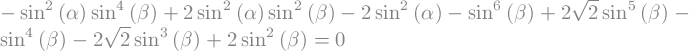

In [30]:
tmp = (TR2((_))).subs({cos(beta):sqrt(1-sin(beta)**2)})
tmp
tmp2 = factor(Eq(
    numer(tmp.lhs)*denom(tmp.rhs)-
    numer(tmp.rhs)*denom(tmp.lhs),
    0
))
sinalpha_sinbeta_eqn = Eq(simplify(numer(tmp2.subs(sub_).lhs)),0)
sinalpha_sinbeta_eqn

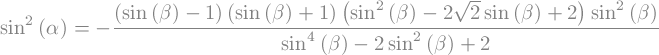

In [31]:
sinalpha2_eqn = factor(Eq(
    sin(alpha) ** 2,
    (solve(sinalpha_sinbeta_eqn, sin(alpha) ** 2)[0]).subs(
        {cos(beta) ** 2: 1 - sin(beta) ** 2}
    )
))
sinalpha2_eqn


In [32]:
tmp3 = (numer(sinalpha2_eqn.rhs).args[-1])
tmp3

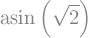

In [33]:
asin(solve(tmp3, sin(beta))[0])

In [34]:
tmp4 = denom(sinalpha2_eqn.rhs)
tmp4

In [35]:
solve(tmp4, sin(beta)**2)

Solutions for $\beta$. But beware, we have defined (to enable earlier simplifications) $\beta$ to be positive, so the zero and negative solutions here will cause problems.

In [36]:
[asin(soln_).n() for soln_ in solve(sinalpha_sinbeta_eqn.subs({alpha:0}), sin(beta))]

In [37]:
[asin(soln_).n() for soln_ in solve(sinalpha_sinbeta_eqn.subs({beta:sy.pi/3}), sin(alpha))]

### Figuratrix

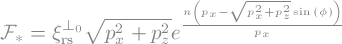

In [38]:
Fstar_rs_pxpz_eqn

In [39]:
fgtx_raw_eqn = simplify(
    Fstar_rs_pxpz_eqn
        .subs({Fstar:1})
        .subs({px:p*sin(beta), pz:-p*cos(beta)})
)
fgtx_raw_eqn

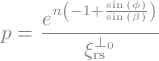

In [40]:
fgtx_p_beta_eqn = Eq(
    p,
    solve( fgtx_raw_eqn, p )[0]
)
fgtx_p_beta_eqn

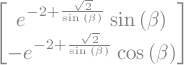

In [41]:
p_covec_fn_ = Matrix([
    (fgtx_p_beta_eqn.rhs*sin(beta)).subs(sub_),
    (-fgtx_p_beta_eqn.rhs*cos(beta)).subs(sub_)
])
# sy.plot_parametric( px_fn,pz_fn, (beta,0.2,sy.pi/3) );
p_covec_fn_

In [42]:
px_lmbda_ = lambdify([beta], p_covec_fn_[0])
pz_lmbda_ = lambdify([beta], p_covec_fn_[1])
p_lmbda_ = lambdify([beta], sqrt(p_covec_fn_[0]**2+p_covec_fn_[1]**2))
px_lmbda_(beta_), pz_lmbda_(beta_), p_lmbda_(beta_)

Check conjugacy.

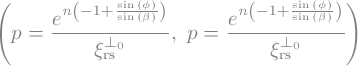

In [43]:
fgtx_p_beta_eqn, p_conjugate_beta_eqn

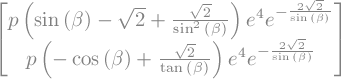

In [44]:
v_vec_fn_ =  v_p_beta_eqn.rhs.subs(sub_)
v_vec_fn_

In [45]:
vx_lmbda_ = lambdify(
    [beta],
    v_vec_fn_[0].subs({p: sqrt(p_covec_fn_[0] ** 2 + p_covec_fn_[1] ** 2)}),
)
vz_lmbda_ = lambdify(
    [beta],
    v_vec_fn_[1].subs({p: sqrt(p_covec_fn_[0] ** 2 + p_covec_fn_[1] ** 2)}),
)
v_lmbda_ = lambdify(
    [beta],
    sqrt(v_vec_fn_[0] ** 2 + v_vec_fn_[1] ** 2).subs(
        {p: sqrt(p_covec_fn_[0] ** 2 + p_covec_fn_[1] ** 2)}
    ),
)
vx_lmbda_(beta_), vz_lmbda_(beta_), v_lmbda_(beta_)


In [46]:
vx_lmbda_(beta_)*px_lmbda_(beta_) + vz_lmbda_(beta_)*pz_lmbda_(beta_)

# Plots

In [47]:
beta_array = np.linspace(0.01,np.pi/2*1,300)
px_array = px_lmbda_(beta_array) 
pz_array = pz_lmbda_(beta_array)
vx_array = vx_lmbda_(beta_array)
vz_array = vz_lmbda_(beta_array)
vx_array = vx_array[np.isfinite(vx_array)]
vz_array = vz_array[np.isfinite(vz_array)]

In [48]:
def mark_critical_angles(n_,x_lmbda_,z_lmbda_):
    if n_==1:
        plt.plot(
            x_lmbda_(0.01),
            z_lmbda_(0.01),
            '>',
            label=r'$\beta=0$',
        )
        plt.plot(
            x_lmbda_(np.pi/9),
            z_lmbda_(np.pi/9),
            'v',
            label=r'$\beta=\pi/9$',
        )
        plt.plot(
            x_lmbda_(np.pi/4),
            z_lmbda_(np.pi/4),
            'o',
            label=r'$\beta=\pi/4$',
        )
        plt.plot(
            x_lmbda_(np.pi/3),
            z_lmbda_(np.pi/3),
            '^',
            label=r'$\beta=\pi/3$',
        )
        plt.plot(
            x_lmbda_(np.pi/2),
            z_lmbda_(np.pi/2),
            's',
            label=r'$\beta=\pi/2$',
        )
    elif n_==2:
        plt.plot(
            x_lmbda_(0.01),
            z_lmbda_(0.01),
            '>',
            label=r'$\beta=0$',
        )
        plt.plot(
            x_lmbda_(np.pi/9),
            z_lmbda_(np.pi/9),
            'v',
            ms=0,
        )
        plt.plot(
            x_lmbda_(np.pi/5),
            z_lmbda_(np.pi/5),
            'o',
            label=r'$\beta=\pi/5$',
        )
        plt.plot(
            x_lmbda_(np.pi/3),
            z_lmbda_(np.pi/3),
            '^',
            ms=0,
        )
        plt.plot(
            x_lmbda_(np.pi/2),
            z_lmbda_(np.pi/2),
            's',
            label=r'$\beta=\pi/2$',
        )

Substituting symbol F from STIXNonUnicode
Substituting symbol F from STIXNonUnicode
Substituting symbol F from STIXNonUnicode


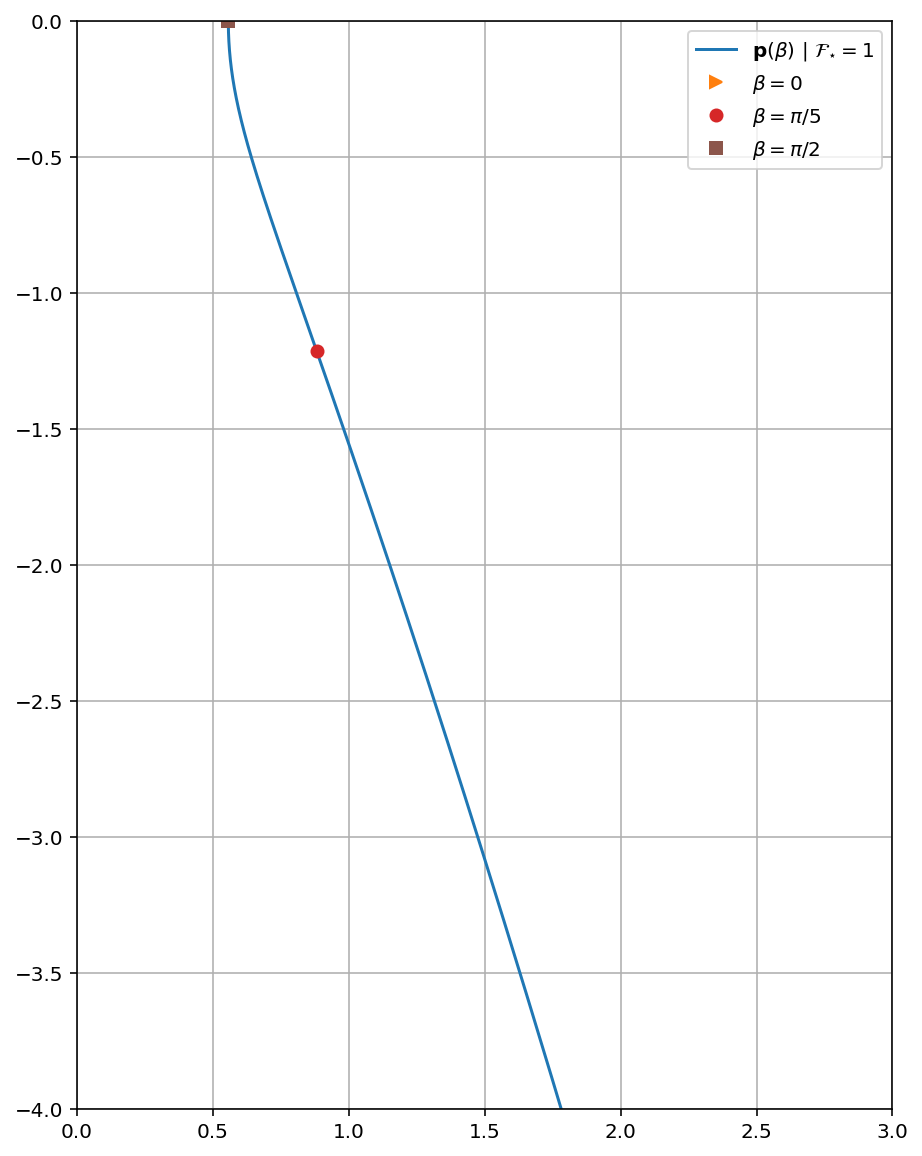

In [49]:
plt.figure(figsize=(10, 10))
plt.plot(
    px_array,
    pz_array,
    label=r"$\mathbf{p}(\beta) \,\,|\,\,\mathcal{F}_{\star}=1$",
)
mark_critical_angles(n_, px_lmbda_, pz_lmbda_)
# plt.plot( vx_array,vz_array )
# plt.plot( np.log(px_lmbda_(beta_array)), np.log(-pz_lmbda_(beta_array)) )
plt.grid(":")
plt.xlim(0, 3)
plt.ylim(-4, 0)
axes = plt.gca()
axes.set_aspect(1)
plt.legend();

Substituting symbol F from STIXNonUnicode
Substituting symbol F from STIXNonUnicode
Substituting symbol F from STIXNonUnicode


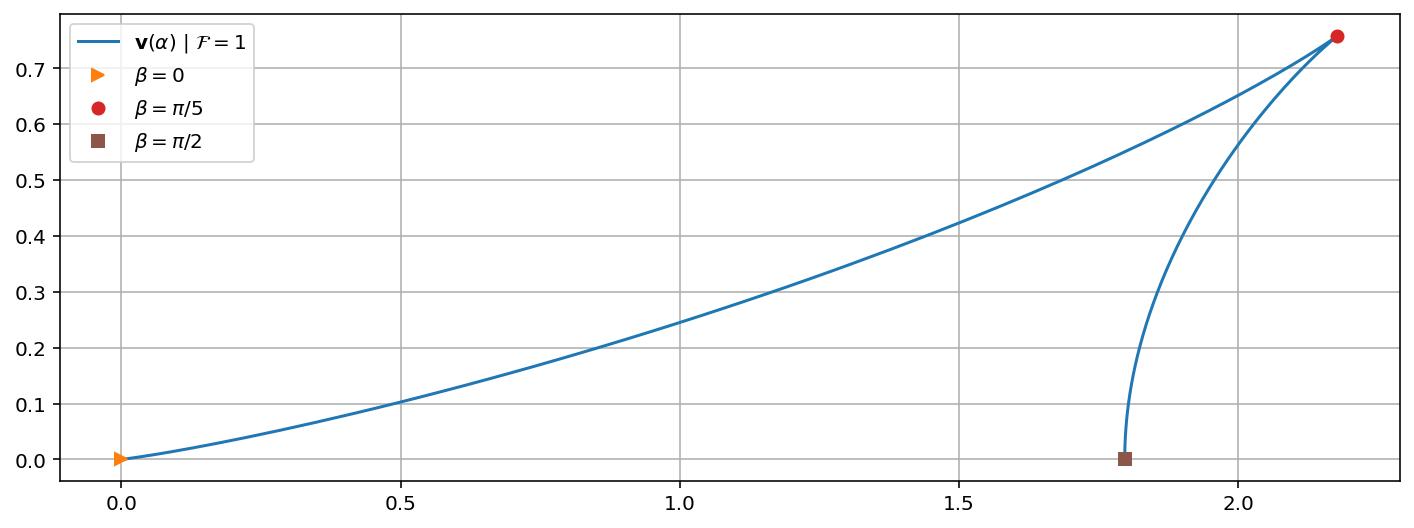

In [50]:
plt.figure(figsize=(12, 12))
# plt.plot( px_array,pz_array )
plt.plot(
    vx_array,
    vz_array,
    label=r"$\mathbf{v}(\alpha) \,\,|\,\,\mathcal{F}=1$",
)
mark_critical_angles(n_, vx_lmbda_, vz_lmbda_)
# plt.plot( np.log(px_lmbda_(beta_array)), np.log(-pz_lmbda_(beta_array)) )
plt.grid(":")
# plt.xlim(1.9,2)
# plt.ylim(0.3,0.35)
axes = plt.gca()
axes.set_aspect(1)
plt.legend();

# Save

In [51]:
# pp(gr.fdict)

In [52]:
# plots_dir = create_directories(pr.save.figs_path, pr.job.group_name)
# export_plots(
#     gr.fdict,
#     plots_dir,
#     pr.save.figs_format,
#     suffix="",
#     dpi=pr.save.figs_options["dpi"],
# )